## Predicting Car Price

This data is a **classification problem**, trying to predict class of selling price of car.

The followings describe the features.

- **name**: name and brand of car
- **Year**: 
- **selling_price**: price of selling car
- **km_driven**: how many kilometer car is driven
- **fuel**: Type of fuel that car consume (Diesel, Petrol, LPG, CNG)
- **seller_type**: who is seller (Individual, Dealer, Trustmark Dealer)
- **transmission**: Type of gear (Manual, Automatic)
- **owner**: First Owner, Second Owner, Third Owner, Fourth & Above Owner
- **mileage**: how many kilometer per 1 liter of fuel that car can drive
- **engine**: 
- **max_power**: the maximum power of the cars
- **seats**: 

The Chaky company make new car with his brand (new brand) and want to find selling car price of the car.

In this assignment, I will try to train many model in different value of parameter.

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter('ignore')

## 1. Load data

In [2]:
df = pd.read_csv('Cars.csv')

In [3]:
# Print the first five rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
# Check the shape of your data
df.shape

(8128, 13)

In [5]:
# Show Statistical information of data
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
# Check data type of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


### Some data preparation

In [7]:
# Replace First Owner to 1, Second Owner to 2, Third Owner to 3, Fourth & Above Owner to 4, Test Drive Car to 5
df["owner"] = df["owner"].replace(["First Owner", "Second Owner", "Third Owner", "Fourth & Above Owner", "Test Drive Car"], [1, 2, 3, 4, 5])

In [8]:
# Remove all rows with CNG and LPG
df.drop(df[(df['fuel']=='LPG') | (df['fuel']=='CNG')].index, inplace = True)

In [9]:
# Remove 'kmpl' and convert the column to float
df['mileage'] = df['mileage'].str.replace('kmpl', '').astype('float64')

In [10]:
# Remove 'CC' and convert the column to float
df['engine'] = df['engine'].str.replace('CC', '').astype('float64')

In [11]:
# Remove 'bhp' and convert the column to float
df['max_power'] = df['max_power'].str.replace('bhp', '').astype('float64')

In [12]:
# Rename the name column and assign only the first word of car's name
df['name'] = df['name'].str.split().str[0]
df = df.rename(columns={'name': 'brand'}) 

In [13]:
# Drop the feature torque
df.drop('torque', axis='columns', inplace=True)

In [14]:
# Remove all car that is test drive car
df.drop(df[df['owner']==5].index, inplace = True)

In [15]:
# # Take log transform to selling_price column
df['selling_price'] = np.log(df['selling_price'])

In [16]:
# Print the first five rows of data
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,12.821258,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,11.970350,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323856,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [17]:
# Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   float64
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 815.3+ KB


### Convert every column to numeric

In [18]:
# label encoding in brand column

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["brand"] = le.fit_transform(df["brand"])

In [19]:
# label encoding in fuel column
le = LabelEncoder()
df["fuel"] = le.fit_transform(df["fuel"])


In [20]:
# label encoding in seller type column
le = LabelEncoder()
df["seller_type"] = le.fit_transform(df["seller_type"])

In [21]:
# label encoding in transmission column
le = LabelEncoder()
df["transmission"] = le.fit_transform(df["transmission"])
le.classes_

array(['Automatic', 'Manual'], dtype=object)

In [22]:
#one-hot encoding in owner
df  = pd.get_dummies(df,  columns=['owner'], drop_first=True)

In [23]:
# Print the first five rows of data
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,seats,owner_2,owner_3,owner_4
0,20,2014,13.017003,145500,0,1,1,23.40,1248.0,74.00,5.0,0,0,0
1,27,2014,12.821258,120000,0,1,1,21.14,1498.0,103.52,5.0,1,0,0
2,10,2006,11.970350,140000,1,1,1,17.70,1497.0,78.00,5.0,0,1,0
3,11,2010,12.323856,127000,0,1,1,23.00,1396.0,90.00,5.0,0,0,0
4,20,2007,11.775290,120000,1,1,1,16.10,1298.0,88.20,5.0,0,0,0


### Change the selling price to category 

In [24]:
# Separate the selling price in 4 classes
# Class 0: (10.303, 11.761]
# Class 1: (11.761, 13.214]
# Class 2: (13.214, 14.666]
# Class 3: (14.666, 16.118]

df['selling_price'] = pd.cut(df['selling_price'], 4, labels=[0,1,2,3])

In [25]:
# Print unique element in selling price
df['selling_price'].unique()

[1, 0, 2, 3]
Categories (4, int64): [0 < 1 < 2 < 3]

In [26]:
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,seats,owner_2,owner_3,owner_4
0,20,2014,1,145500,0,1,1,23.40,1248.0,74.00,5.0,0,0,0
1,27,2014,1,120000,0,1,1,21.14,1498.0,103.52,5.0,1,0,0
2,10,2006,1,140000,1,1,1,17.70,1497.0,78.00,5.0,0,1,0
3,11,2010,1,127000,0,1,1,23.00,1396.0,90.00,5.0,0,0,0
4,20,2007,1,120000,1,1,1,16.10,1298.0,88.20,5.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,11,2013,1,110000,1,1,1,18.50,1197.0,82.85,5.0,0,0,0
8124,11,2007,1,119000,0,1,1,16.80,1493.0,110.00,5.0,0,0,1
8125,20,2009,1,120000,0,1,1,19.30,1248.0,73.90,5.0,0,0,0
8126,28,2013,1,25000,0,1,1,23.57,1396.0,70.00,5.0,0,0,0


In [27]:
# Convert the category column to numeric column
df['selling_price'] = df['selling_price'].astype('int64')

In [28]:
# Check the data type of all column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   int64  
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   int64  
 5   seller_type    8028 non-null   int64  
 6   transmission   8028 non-null   int64  
 7   mileage        7814 non-null   float64
 8   engine         7814 non-null   float64
 9   max_power      7820 non-null   float64
 10  seats          7814 non-null   float64
 11  owner_2        8028 non-null   uint8  
 12  owner_3        8028 non-null   uint8  
 13  owner_4        8028 non-null   uint8  
dtypes: float64(4), int64(7), uint8(3)
memory usage: 776.1 KB


Now, all of column are numeric 

In [29]:
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,seats,owner_2,owner_3,owner_4
0,20,2014,1,145500,0,1,1,23.40,1248.0,74.00,5.0,0,0,0
1,27,2014,1,120000,0,1,1,21.14,1498.0,103.52,5.0,1,0,0
2,10,2006,1,140000,1,1,1,17.70,1497.0,78.00,5.0,0,1,0
3,11,2010,1,127000,0,1,1,23.00,1396.0,90.00,5.0,0,0,0
4,20,2007,1,120000,1,1,1,16.10,1298.0,88.20,5.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,11,2013,1,110000,1,1,1,18.50,1197.0,82.85,5.0,0,0,0
8124,11,2007,1,119000,0,1,1,16.80,1493.0,110.00,5.0,0,0,1
8125,20,2009,1,120000,0,1,1,19.30,1248.0,73.90,5.0,0,0,0
8126,28,2013,1,25000,0,1,1,23.57,1396.0,70.00,5.0,0,0,0


### Split data into training and test dataset

In [30]:
idx = np.arange(0,len(df),1)
np.random.seed(42) # set seed to get shuffle in the same order
np.random.shuffle(idx)
idx_train = idx[0:int(.8*len(df))]
idx_test = idx[len(idx_train):len(idx)]

df_train = df.iloc[idx_train]
df_test = df.iloc[idx_test]

## 2. Exploratory Data Analysis

EDA is the step to see the data distribution and let us better understand the data in training set.

### Multivariate analysis

#### Boxplot

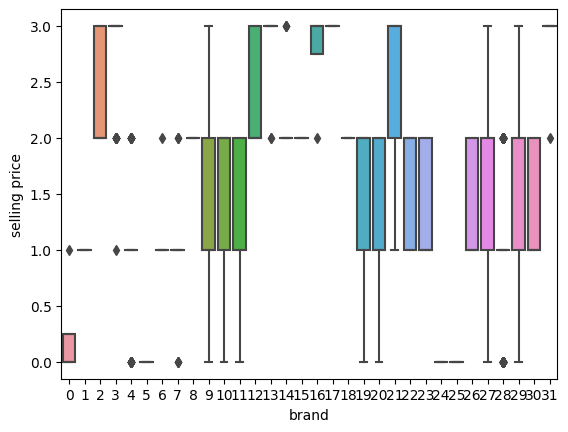

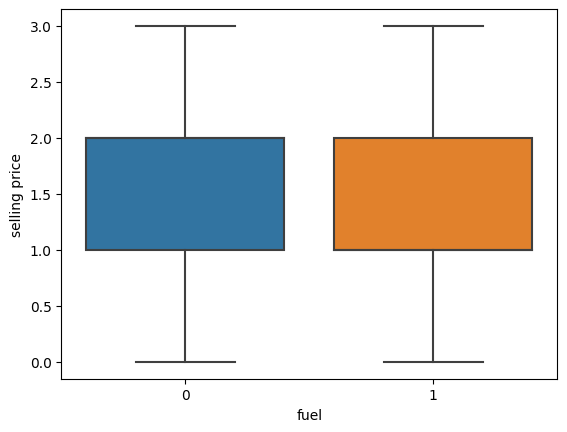

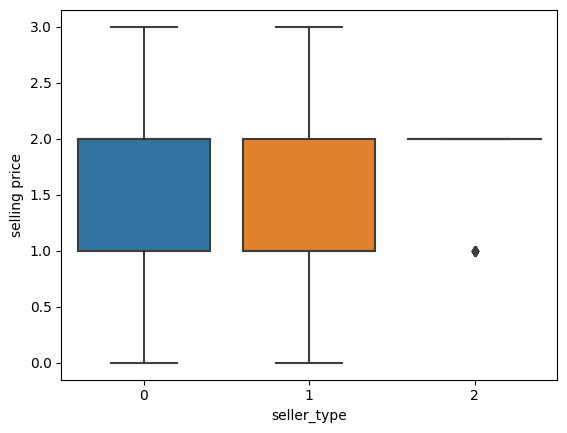

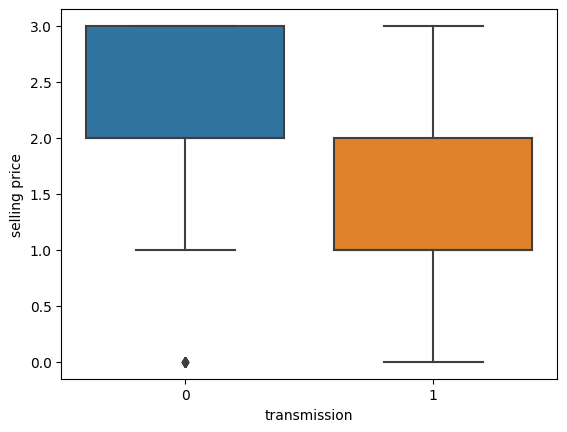

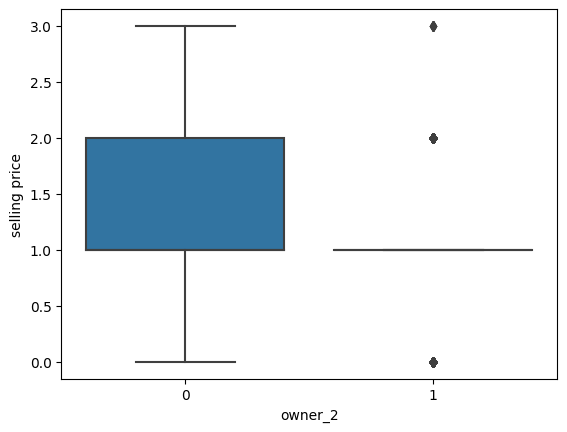

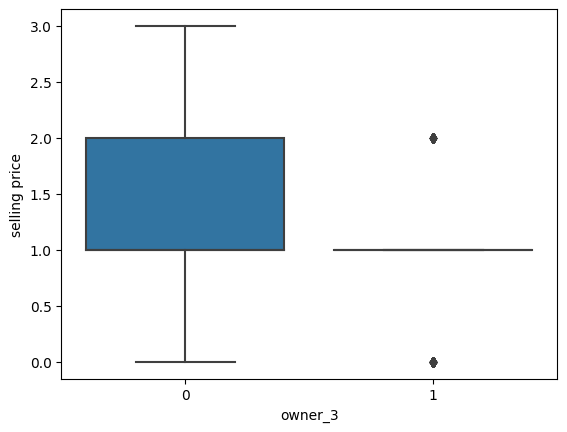

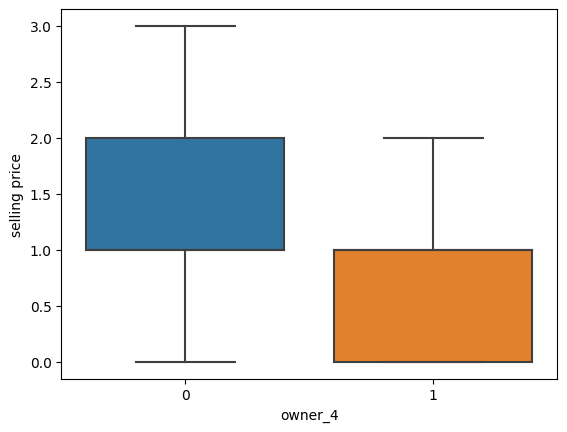

In [31]:
# Create bar plot for category columns with selling price
for col in df_train[['brand', 'fuel', 'seller_type', 'transmission', 'owner_2', 'owner_3', 'owner_4']].columns:
    sns.boxplot(x = df_train[col], y = df_train["selling_price"])
    plt.ylabel("selling price")
    plt.xlabel(col)
    plt.show()

From the box plot, I can analyze 2 things:
1. The car with automatic transmission (0) has higher selling price than the car with manual transmission (1) (transmission and selling price box plot)
2. The more owner, The lower the selling price (owner and selling price box plot)

#### Scatterplot plot

<Axes: xlabel='max_power', ylabel='engine'>

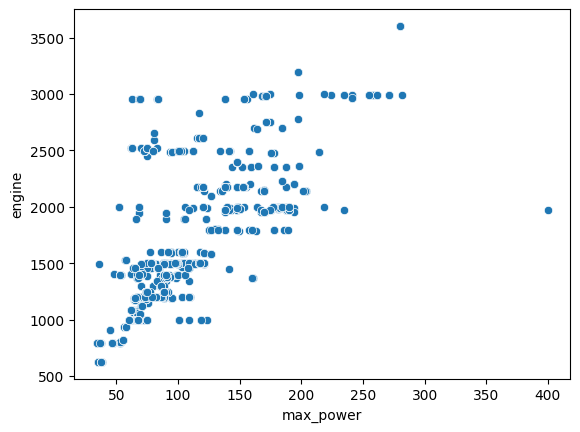

In [32]:
# To see the relation between max power and engine
sns.scatterplot(x = df_train['max_power'], y = df_train['engine'])

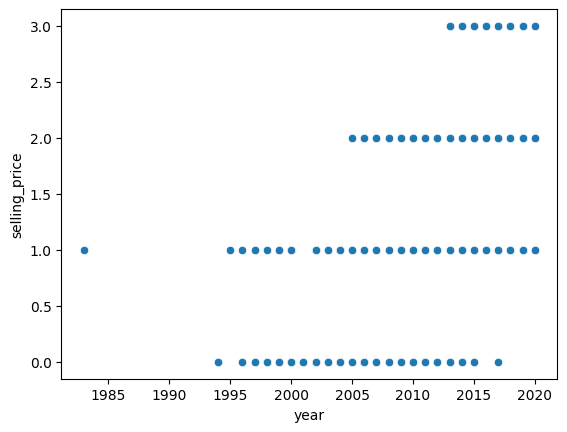

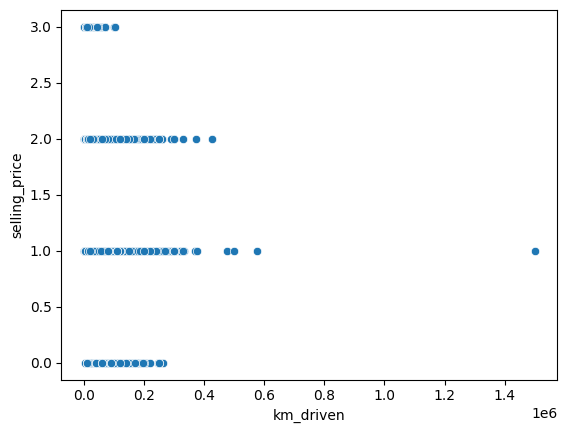

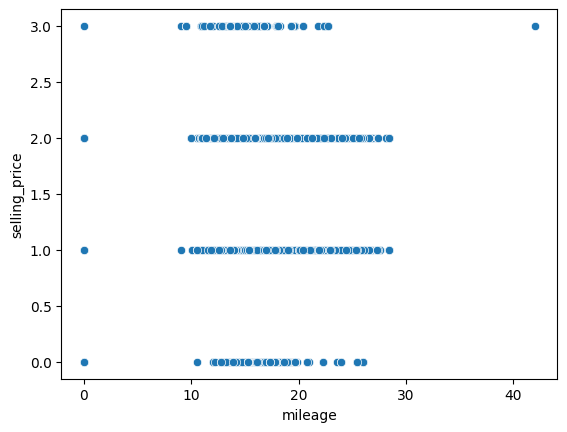

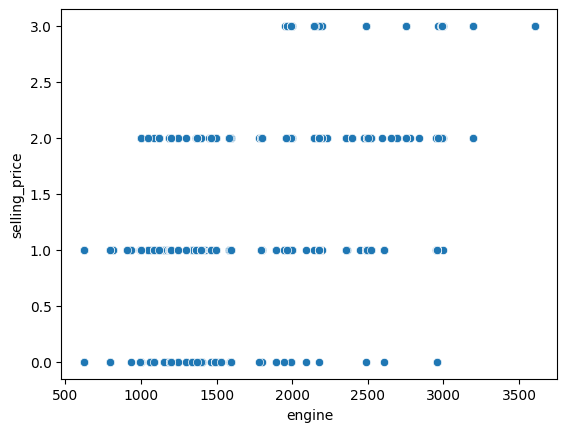

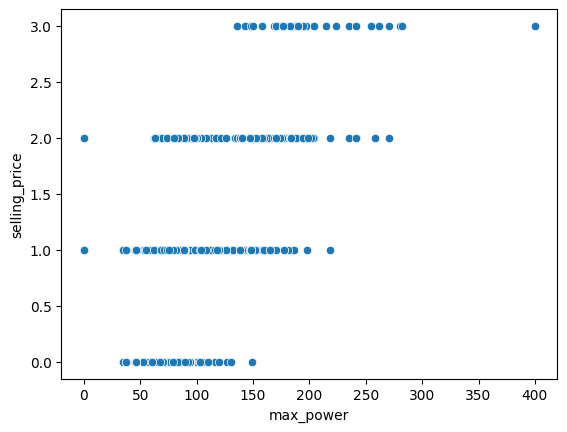

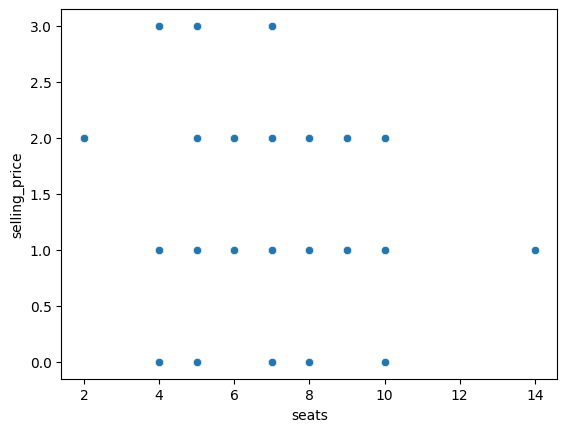

In [33]:
# Create scatter plot for numeric columns with selling price
for col in df_train[['year','km_driven', 'mileage', 'engine', 'max_power', 'seats']].columns:
    sns.scatterplot(x = df_train[col], y = df_train['selling_price'])
    plt.show()

From the scatter plot, I can analyze 3 things:
1. the most of max power and engine data is linear correlation. When max power increases, the engine increases (max power and engine graph)
2. If the car is new, the price is high (year and selling price graph)
3. When the max power of the car is high, and the price is high (max power and selling price graph)
4. km_driven is not effect to car price (km_driven and selling price graph)

#### Correlation Matrix

Use correlation matrix to find the strong feature to predict selling price of a car and check the feature which correlate to each other.

<Axes: >

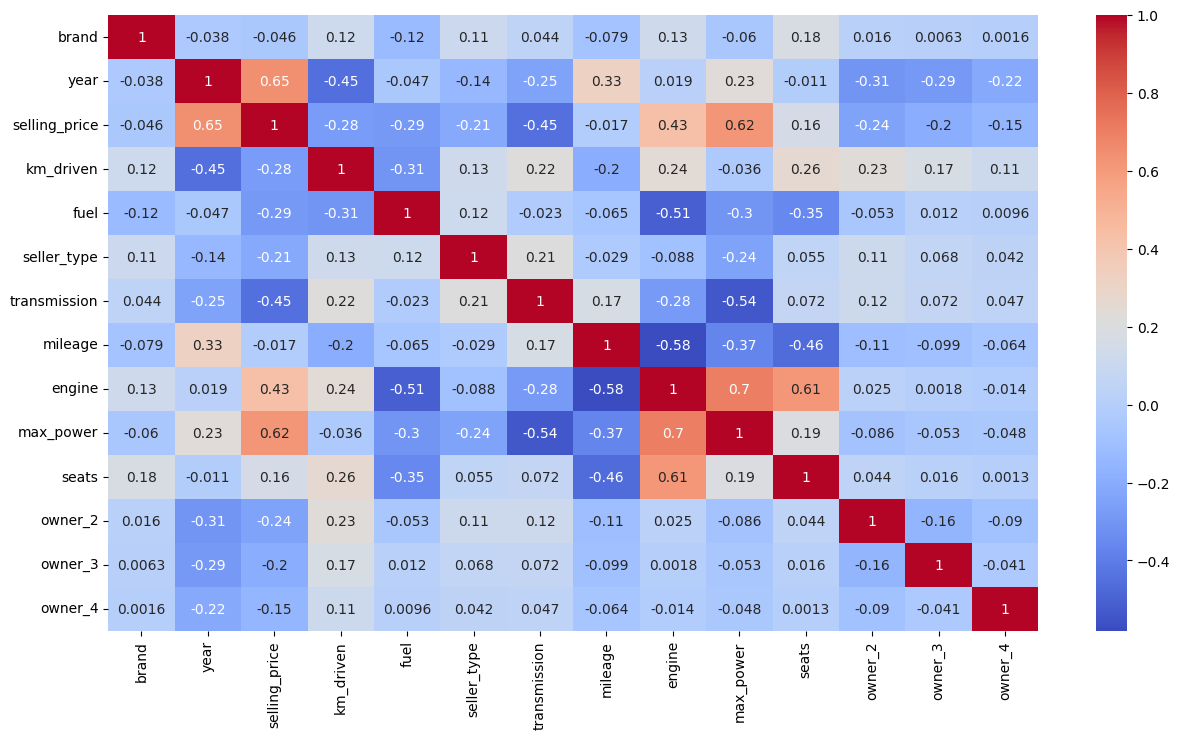

In [34]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df_train.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

#### Predictive Power Score

To see how well each 1 feature predict target feature 

<Axes: xlabel='x', ylabel='y'>

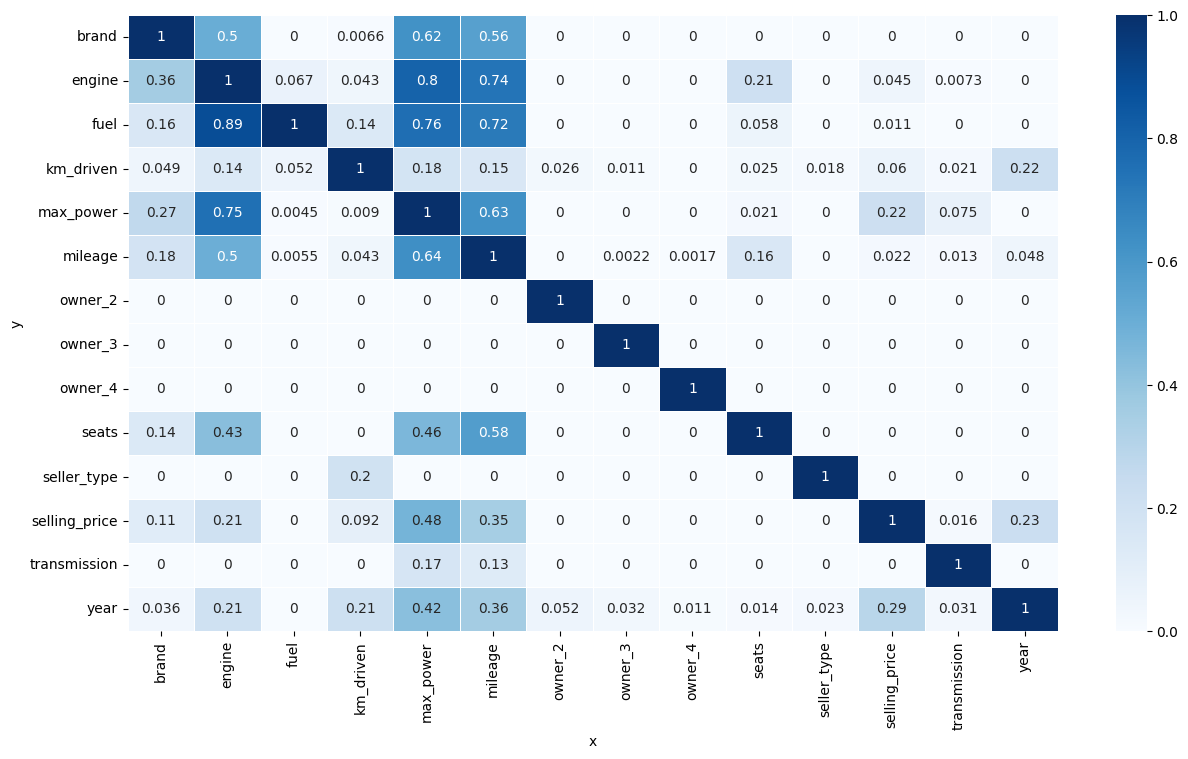

In [35]:
import ppscore as pps

# Copy dataframe
dfcopy = df_train.copy()

matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#Plot PPS map
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## 3. Feature Engineering

We don't need to Dimensionality reduction, Feature splitting, and Creating features in this data 

## 4. Feature selection

From the concept of Chaky company, I can cut 2 candidate feature including:
1. year: I don't know what year column mean. It may be year of starting to use a car or year of produced, so I cut it as candidate feature.
2. brand: Chaky company make new brand, so this column is not necessary to create model to predict Chaky's brand.

From the correlation matrix and scatterplot of engine and max power, I can conclude that engine and max power have a high correlation, and I pick one of those, which is max power as a feature and cut engine.

From the scatter plot of km_driven and selling_price on EDA part, it show the km_driven don't effect to selling price

From the PPS map, I can analyze which feature is well predict the selling price, and I can order from good to bad score to predict the selling price:
1. max_power
2. mileage
3. transmission

In [36]:
# Select the strong features
X_train = df_train[        ['max_power', 'mileage', 'transmission']        ]
X_test = df_test[        ['max_power', 'mileage', 'transmission']        ]

# Assign selling price as label
y_train = df_train["selling_price"]
y_test = df_test["selling_price"]

In [37]:
# Count the samples of each classes
df_train['selling_price'].value_counts()

1    3398
2    2308
0     444
3     272
Name: selling_price, dtype: int64

In [38]:
# Make a one-hot encoding for selling price
y_train = pd.get_dummies(y_train,  columns=['selling_price'])

## 5. Preprocessing

### Checking null values

In [40]:
# Check null in X_train
X_train.isna().sum()

max_power       165
mileage         170
transmission      0
dtype: int64

In [41]:
# Check null in X_test
X_test.isna().sum()

max_power       43
mileage         44
transmission     0
dtype: int64

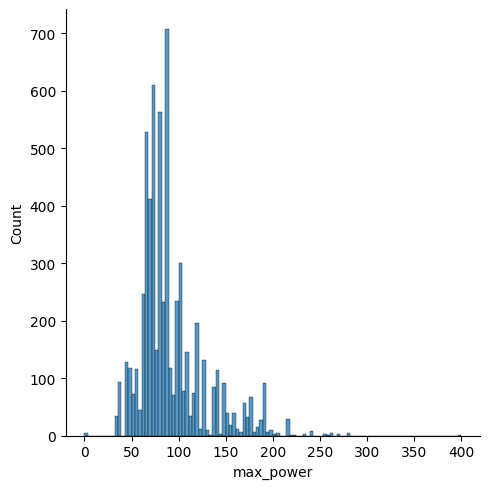

In [42]:
#Plot Distribution plot of max power
sns.displot(data=X_train, x='max_power')

In [43]:
# Find mean of max power
X_train['max_power'].mean()

91.97893798945181

In [44]:
# Find median of max power
X_train['max_power'].median()

82.4

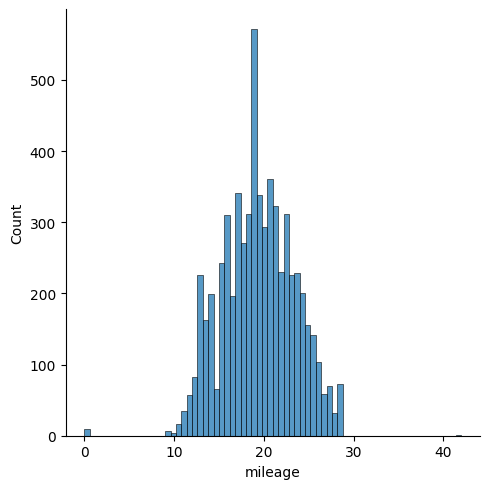

In [45]:
#Plot Distribution plot of mileage
sns.displot(data=X_train, x='mileage')

In [46]:
# Find mean of mileage
X_train['mileage'].mean()

19.372290467050544

In [47]:
# Find median of mileage
X_train['mileage'].median()

19.3

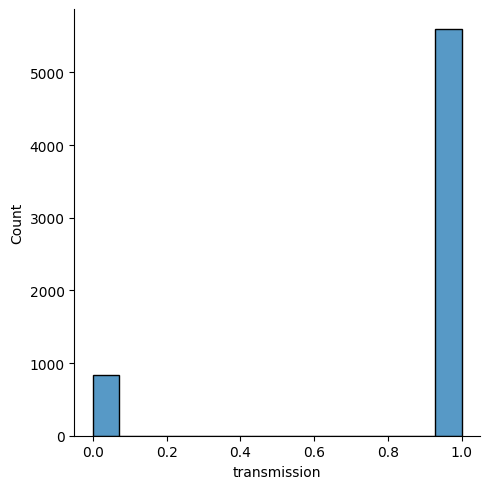

In [48]:
#Plot Distribution plot of transmission
sns.displot(data=X_train, x='transmission')

In [49]:
# Find mode of transmission
X_train['transmission'].mode()

0    1
Name: transmission, dtype: int64

In [50]:
# fill the mean and median to null value in the training set
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [51]:
# fill the mean and median of training set to null value in the test set
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [52]:
#check null in X_train again
X_train.isna().sum()

max_power       0
mileage         0
transmission    0
dtype: int64

In [53]:
#check null in X_test again
X_test.isna().sum()

max_power       0
mileage         0
transmission    0
dtype: int64

### Checking Outliers

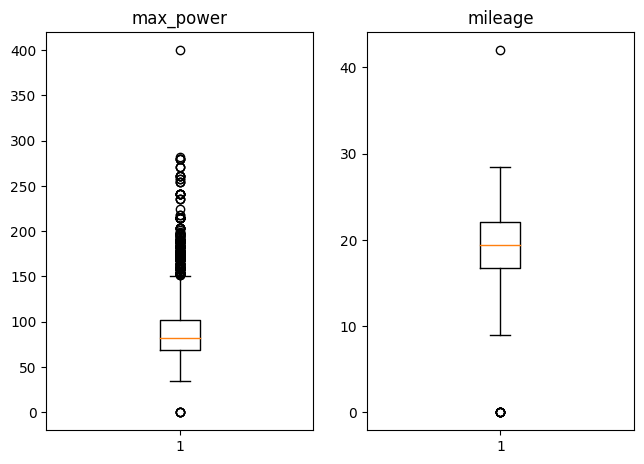

In [54]:
# Check outlier in numeric column (not category column)
# Create a dictionary of columns.
col_dict = {'max_power':1,'mileage':2}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,5,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [55]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [56]:
for col in X_train[['max_power','mileage']].columns:
    outlier_count(col)


---------------max_power---------------

Number of outliers: 480
Percent of data that is outlier: 7.47%

---------------mileage---------------

Number of outliers: 10
Percent of data that is outlier: 0.16%


In [57]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 3)
Shape of X_test:  (1606, 3)
Shape of y_train:  (6422, 4)
Shape of y_test:  (1606,)


In [58]:
y_train = y_train.values
y_test = y_test.values

In [59]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from math import *
from random import *
from time import time

# Scale only numeric column
scaler = StandardScaler()
X_train[['max_power', 'mileage']] = scaler.fit_transform(X_train[['max_power', 'mileage']])
X_test[['max_power', 'mileage']]  = scaler.transform(X_test[['max_power', 'mileage']])

# Insert 1 on first index of each samples
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)


m = X_train.shape[0]  #number of samples 
n = X_train.shape[1]  #number of features  
k = y_train.shape[1]  #number of classes


In [60]:
# Save the scaler value for using it in app.py
import pickle

pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [61]:
X_train[:,3]

array([1., 1., 1., ..., 1., 1., 1.])

## 6. Modeling

In [1]:
#experiment tracking
import mlflow
import os
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("https://mlflow.cs.ait.ac.th/")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "noppawee"
#mlflow.create_experiment(name="st124482-a3")  #create if you haven't create
mlflow.set_experiment(experiment_name="st124482-a3")

<Experiment: artifact_location='mlflow-artifacts:/499801400669538043', creation_time=1696083119086, experiment_id='499801400669538043', last_update_time=1696083119086, lifecycle_stage='active', name='st124482-a3', tags={}>

In [ ]:
from sklearn.model_selection import KFold
class LogisticRegression:

    kfold = KFold(n_splits=3)
    
    def __init__(self, regularization, k, n, method, alpha = 0.001,max_iter=10000, cv = kfold):
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        self.regularization = regularization
        self.cv         = cv


    
    # function for calculate the loss of validation
    def val_loss(self, X, ytrue):
        m = ytrue.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(ytrue*np.log(h)) / m
        return loss
    
     

    def fit(self, X, Y):
        self.val_losses = []
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X)):
            print("="*5,f"Fold{fold}","="*5)
            X_cross_train = X[train_idx]
            y_cross_train = Y[train_idx]
            X_cross_val   = X[val_idx]
            y_cross_val   = Y[val_idx]


            # Create the class weight for dealing with imbalance class in training set
            # Define the desired class order (e.g., Class 0, Class 1, Class 2)
            class_order = [0, 1, 2, 3]

            # Calculate class frequencies
            class_frequencies = np.sum(y_cross_train, axis=0)

            # Create a dictionary to map class labels to frequencies
            dict(zip(class_order, class_frequencies))

            # Calculate class weights (inverse of class frequencies)
            total_samples = np.sum(class_frequencies)
            class_weights = total_samples / (class_frequencies * len(class_frequencies))


            self.W = np.random.rand(self.n, self.k)
            self.losses = []
            

            #one epoch will exhaust the WHOLE training set
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):            
                params = {"method": self.method, "lr": self.alpha, "reg": type(self).__name__, "max_iter": self.max_iter}
                mlflow.log_params(params=params)
                if self.method == "batch":
                    start_time = time.time()
                    for i in range(self.max_iter):
                        loss, grad =  self.gradient(X_cross_train, y_cross_train)
                        self.losses.append(loss)
                        # Update weights with class weights
                        self.W = self.W - self.alpha * grad * class_weights
                        val_loss = self.val_loss(X_cross_val, y_cross_val)
                        if i%100 == 0:
                            mlflow.log_metric(key="train_loss", value=loss, step = i)
                            mlflow.log_metric(key="val_loss", value=val_loss, step = i)

                        if i % 2000 == 0:
                            print(f"Train Loss at iteration {i}", loss, end=",")
                            print(f"Val Loss at iteration {i}", val_loss)
                    print(f"time taken: {time.time() - start_time}")
                    
                elif self.method == "minibatch":
                    start_time = time.time()
                    batch_size = int(0.3 * X.shape[0])
                    for i in range(self.max_iter):
                        ix = np.random.randint(0, X.shape[0]) #<----with replacement
                        batch_X = X[ix:ix+batch_size]
                        batch_Y = Y[ix:ix+batch_size]
                        loss, grad = self.gradient(batch_X, batch_Y)
                        self.losses.append(loss)
                        # Update weights with class weights
                        self.W = self.W - self.alpha * grad * class_weights
                        val_loss= self.val_loss(X_cross_val, y_cross_val)
                        if i%100 == 0:
                            mlflow.log_metric(key="train_loss", value=loss, step = i)
                            mlflow.log_metric(key="val_loss", value=val_loss, step = i)
                        if i % 2000 == 0:
                            print(f"Train Loss at iteration {i}", loss, end=",")
                            print(f"Val Loss at iteration {i}", val_loss)
                    print(f"time taken: {time.time() - start_time}")
                    
                elif self.method == "sto":
                    start_time = time.time()
                    list_of_used_ix = []
                    for i in range(self.max_iter):
                        idx = np.random.randint(X.shape[0])
                        while i in list_of_used_ix:
                            idx = np.random.randint(X.shape[0])
                        X_train = X[idx, :].reshape(1, -1)
                        Y_train = Y[idx]
                        loss, grad = self.gradient(X_train, Y_train)
                        self.losses.append(loss)
                        # Update weights with class weights
                        self.W = self.W - self.alpha * grad * class_weights
                        val_loss= self.val_loss(X_cross_val, y_cross_val)
                        if i%100 == 0:
                            mlflow.log_metric(key="train_loss", value=loss, step = i)
                            mlflow.log_metric(key="val_loss", value=val_loss, step = i)
                        list_of_used_ix.append(i)
                        if len(list_of_used_ix) == X.shape[0]:
                            list_of_used_ix = []
                        if i % 2000 == 0:
                            print(f"Train Loss at iteration {i}", loss, end=",")
                            print(f"Val Loss at iteration {i}", val_loss)
                    print(f"time taken: {time.time() - start_time}")
                    
                else:
                    raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
            self.val_losses.append(val_loss)
        std = np.std(self.val_losses)
        # log the average of validation loss of 3 fold on MLflow
        mlflow.log_metric(key="mean val_loss", value=sum(self.val_losses) / len(self.val_losses))
        print("Arg of val_loss of 3 fold: ",sum(self.val_losses) / len(self.val_losses) )
        print("Sd of val_loss of 3 fold: ", std)
        params = {"method": self.method, "lr": self.alpha, "reg": type(self).__name__, "max_iter": self.max_iter}
        mlflow.log_params(params=params)
        
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y
        grad = self.softmax_grad(X, error)+ self.regularization.derivation(self.W)
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

    # Function to show the feature importance of each class
    def feature_importance(self):
        for i in range(k):
            coefs = pd.DataFrame(
            self.W[1:,i], columns=[f"Coefficients_class{i}"], index=[f'max_power_class{i}', f'mileage_class{i}', f'transmission_class{i}']
            )            
            coefs.plot(kind="barh", figsize=(6, 4))
            plt.title("Feature Importance")
            plt.axvline(x=0, color=".5")
            plt.show()
            

In [ ]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [ ]:
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, W): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(W))
        
    def derivation(self, W):
        return self.l * 2 * W

class NormalPenalty:

    def __init__(self, l):
        self.l = l
        
    def __call__(self, W): #__call__ allows us to call class as method
        return 0
        
    def derivation(self, W):
        return 0
    
    
        
class Ridge(LogisticRegression):
    
    def __init__(self, k,n, method, alpha, l):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization,k, n, method, alpha)

class Normal(LogisticRegression):
    
    def __init__(self, k,n, method,alpha, l):
        self.regularization = NormalPenalty(l)
        super().__init__(self.regularization,k,n, method, alpha)
        

In [ ]:
dfsdf

===== Ridge sto =====
===== Fold0 =====
Train Loss at iteration 0 1.9001713096082,Val Loss at iteration 0 2.1256054771825066


Train Loss at iteration 2000 2.1446905246169723,Val Loss at iteration 2000 1.8319184225766723
Train Loss at iteration 4000 1.753313764059236,Val Loss at iteration 4000 1.6356829638750643
Train Loss at iteration 6000 1.452453542474119,Val Loss at iteration 6000 1.5000659590335577
Train Loss at iteration 8000 1.3044488514036343,Val Loss at iteration 8000 1.4056614875849276
time taken: 27.732459545135498
===== Fold1 =====
Train Loss at iteration 0 1.414099877798078,Val Loss at iteration 0 1.9401486562257377
Train Loss at iteration 2000 2.5191844953015945,Val Loss at iteration 2000 1.7553725509186116
Train Loss at iteration 4000 1.559164836570929,Val Loss at iteration 4000 1.6167130156527978
Train Loss at iteration 6000 0.98426449049071,Val Loss at iteration 6000 1.514618236114537
Train Loss at iteration 8000 0.8962541799130231,Val Loss at iteration 8000 1.4358641167794843
time taken: 23.098901510238647
===== Fold2 =====
Train Loss at iteration 0 1.6005219245128028,Val Loss at iteration 0 

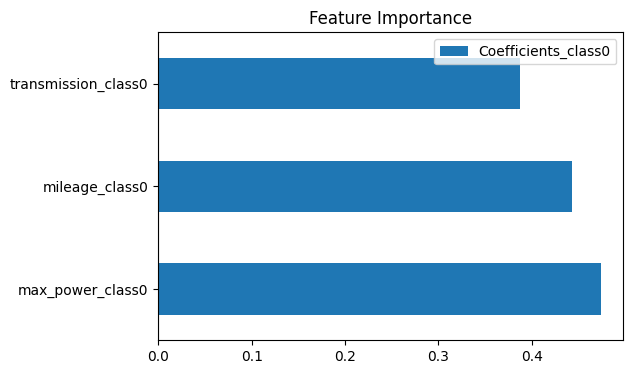

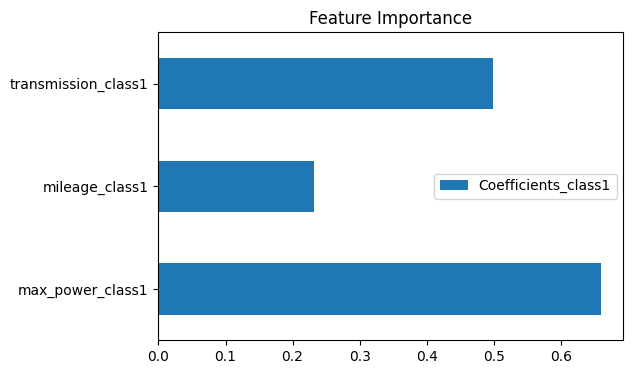

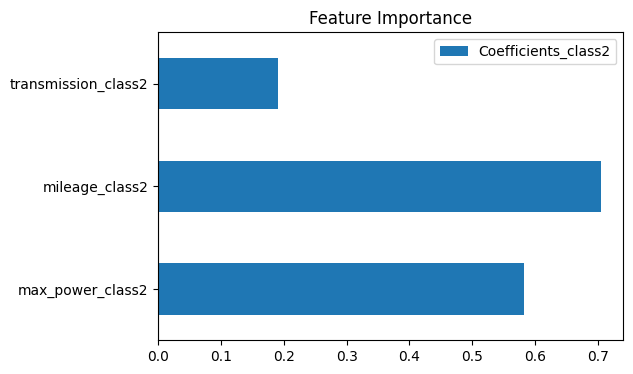

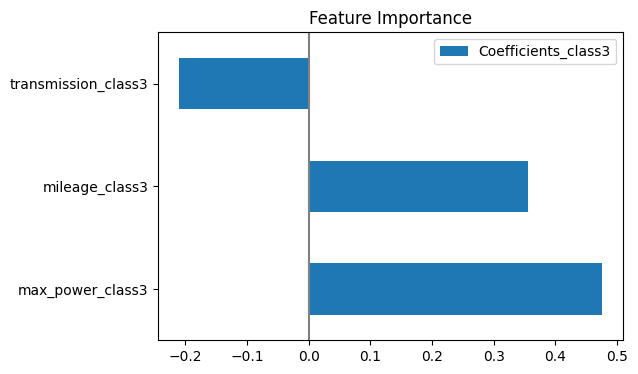

===== Ridge minibatch =====
===== Fold0 =====
Train Loss at iteration 0 1.2244255611859698,Val Loss at iteration 0 1.1497459061512638
Train Loss at iteration 2000 0.7166872903175069,Val Loss at iteration 2000 0.7091880910532932
Train Loss at iteration 4000 0.7136486281666442,Val Loss at iteration 4000 0.7072847755144018
Train Loss at iteration 6000 0.7147602870847544,Val Loss at iteration 6000 0.7070135964599342
Train Loss at iteration 8000 0.7184306213616053,Val Loss at iteration 8000 0.7068312036247251
time taken: 22.874168872833252
===== Fold1 =====
Train Loss at iteration 0 1.5671725903975988,Val Loss at iteration 0 1.4550663294071096
Train Loss at iteration 2000 0.7374086955793099,Val Loss at iteration 2000 0.7116926195535003
Train Loss at iteration 4000 0.7121402638137331,Val Loss at iteration 4000 0.7097413876162628
Train Loss at iteration 6000 0.7195574197924034,Val Loss at iteration 6000 0.7097193982849218
Train Loss at iteration 8000 0.7285462902153431,Val Loss at iteration 8

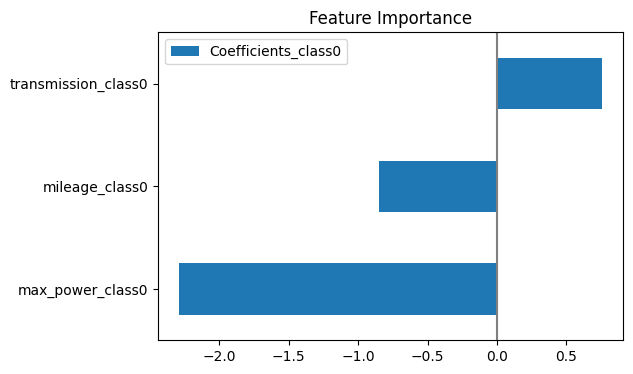

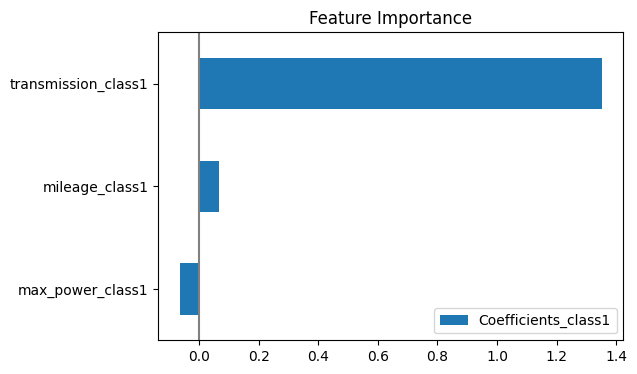

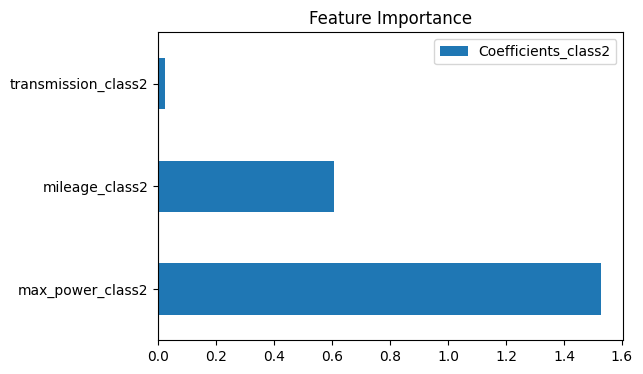

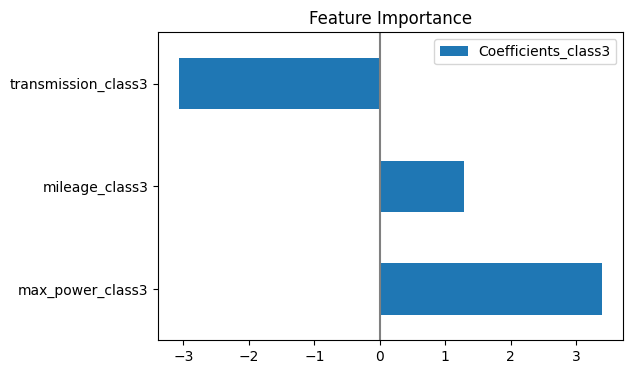

===== Ridge batch =====
===== Fold0 =====
Train Loss at iteration 0 1.590538759494661,Val Loss at iteration 0 1.3587081087054829
Train Loss at iteration 2000 0.7161404169400556,Val Loss at iteration 2000 0.7090585903670666
Train Loss at iteration 4000 0.7160336905163749,Val Loss at iteration 4000 0.7087699180057607
Train Loss at iteration 6000 0.7160216839047432,Val Loss at iteration 6000 0.7087328488143471
Train Loss at iteration 8000 0.7160192406435778,Val Loss at iteration 8000 0.7087267573594995
time taken: 28.760263204574585
===== Fold1 =====
Train Loss at iteration 0 1.600687801119641,Val Loss at iteration 0 1.3771602469825723
Train Loss at iteration 2000 0.7147898344577781,Val Loss at iteration 2000 0.7126779995612046
Train Loss at iteration 4000 0.7146580611735701,Val Loss at iteration 4000 0.7123603730869756
Train Loss at iteration 6000 0.714644199731611,Val Loss at iteration 6000 0.7122996603757342
Train Loss at iteration 8000 0.7146414409521672,Val Loss at iteration 8000 0.7

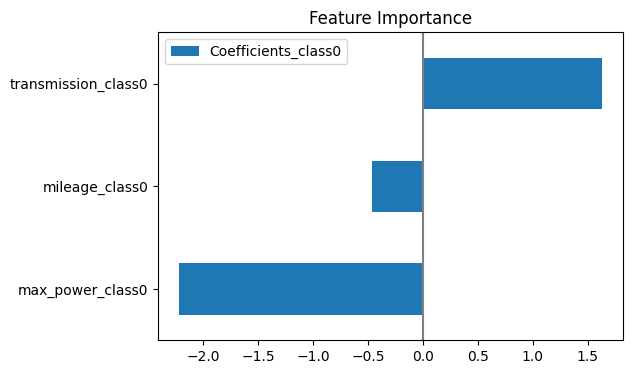

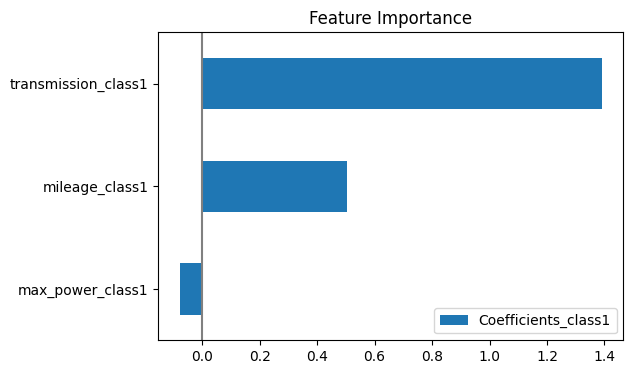

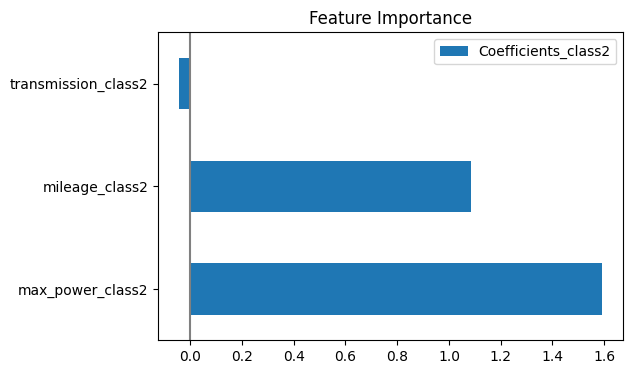

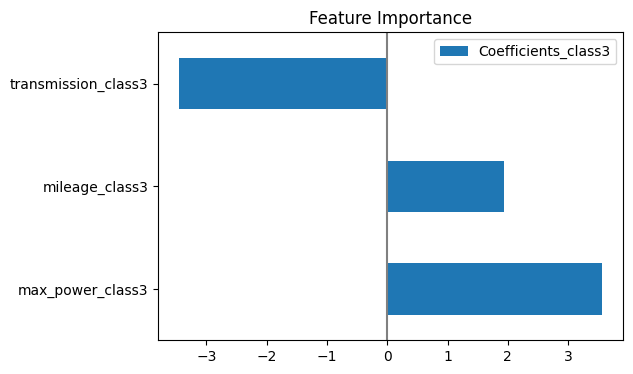

===== Normal sto =====
===== Fold0 =====
Train Loss at iteration 0 0.8726487597256811,Val Loss at iteration 0 1.2269445945886015
Train Loss at iteration 2000 0.601764556063568,Val Loss at iteration 2000 1.1477441320586352
Train Loss at iteration 4000 0.546898424571376,Val Loss at iteration 4000 1.0935515672551133
Train Loss at iteration 6000 1.2507148012682954,Val Loss at iteration 6000 1.0524337640469508
Train Loss at iteration 8000 0.9499366292003651,Val Loss at iteration 8000 1.0215133343023781
time taken: 86.59997129440308
===== Fold1 =====
Train Loss at iteration 0 2.245526381447069,Val Loss at iteration 0 1.6618883191411118
Train Loss at iteration 2000 0.481699187138234,Val Loss at iteration 2000 1.582618594484401
Train Loss at iteration 4000 2.0608090664753136,Val Loss at iteration 4000 1.5157749202262725
Train Loss at iteration 6000 1.5975813503402005,Val Loss at iteration 6000 1.4583717134470784
Train Loss at iteration 8000 1.4698566461276112,Val Loss at iteration 8000 1.40856

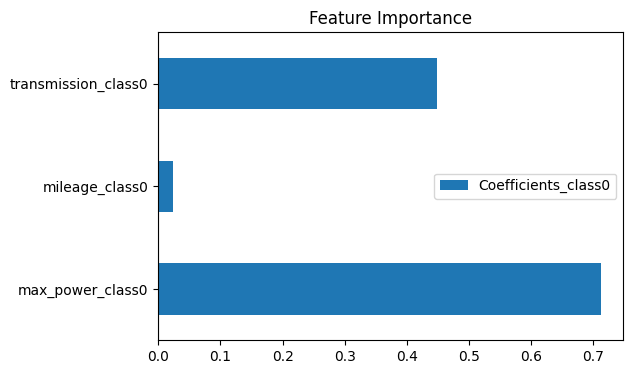

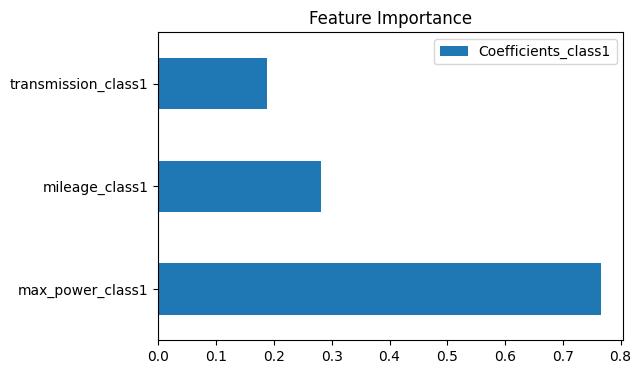

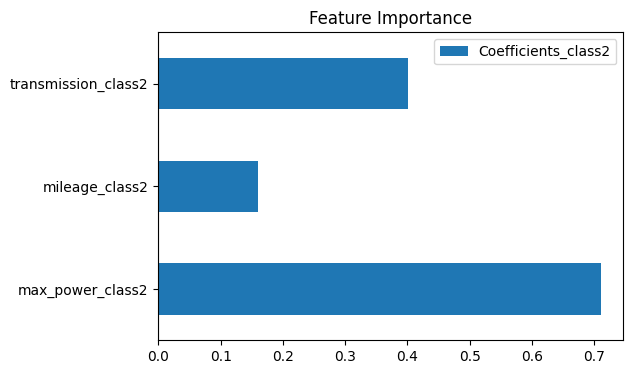

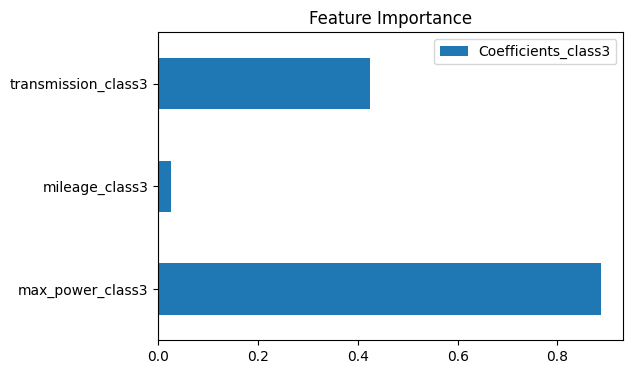

===== Normal minibatch =====
===== Fold0 =====
Train Loss at iteration 0 1.7168236918411834,Val Loss at iteration 0 1.6385135858408155
Train Loss at iteration 2000 0.732457180390095,Val Loss at iteration 2000 0.7083062598708234
Train Loss at iteration 4000 0.7126326507245437,Val Loss at iteration 4000 0.7072142903586562
Train Loss at iteration 6000 0.7208446516587863,Val Loss at iteration 6000 0.7070442929915077
Train Loss at iteration 8000 0.7036568596434211,Val Loss at iteration 8000 0.7069381670726174
time taken: 152.08142471313477
===== Fold1 =====
Train Loss at iteration 0 1.1952396732541961,Val Loss at iteration 0 1.1429977142672707
Train Loss at iteration 2000 0.7151980213303889,Val Loss at iteration 2000 0.7115941483829963
Train Loss at iteration 4000 0.7095337651019211,Val Loss at iteration 4000 0.7091512746204446
Train Loss at iteration 6000 0.7167526308757964,Val Loss at iteration 6000 0.7090517803992797
Train Loss at iteration 8000 0.7146900344824902,Val Loss at iteration 8

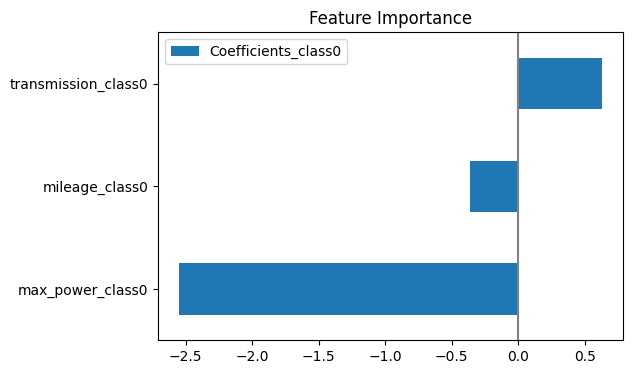

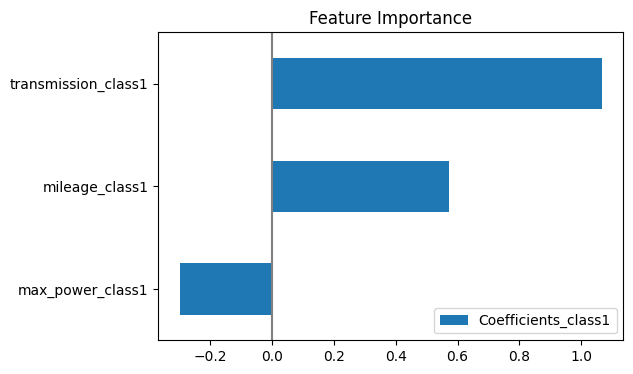

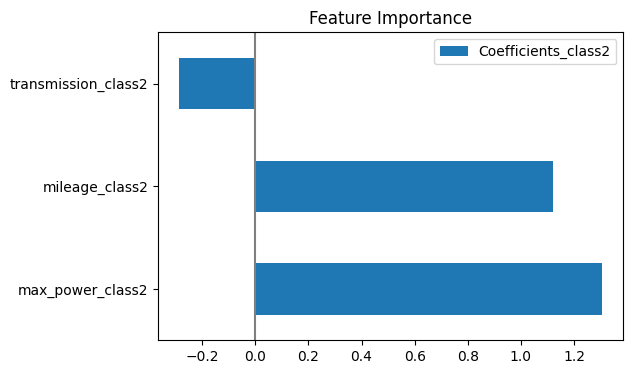

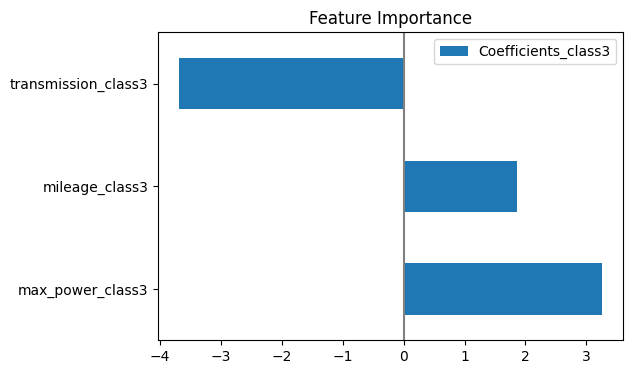

===== Normal batch =====
===== Fold0 =====
Train Loss at iteration 0 1.5986951564340925,Val Loss at iteration 0 1.3247892784074853
Train Loss at iteration 2000 0.7160800668042696,Val Loss at iteration 2000 0.7092360683893669
Train Loss at iteration 4000 0.7159855951197527,Val Loss at iteration 4000 0.7089789676848437
Train Loss at iteration 6000 0.7159794386163781,Val Loss at iteration 6000 0.7089645957087896
Train Loss at iteration 8000 0.7159788698286557,Val Loss at iteration 8000 0.7089678011631446
time taken: 23.074062824249268
===== Fold1 =====
Train Loss at iteration 0 1.403543834644842,Val Loss at iteration 0 1.1790831540694577
Train Loss at iteration 2000 0.71476249632598,Val Loss at iteration 2000 0.7123723207931272
Train Loss at iteration 4000 0.7146274001227634,Val Loss at iteration 4000 0.7120480798680124
Train Loss at iteration 6000 0.7146202457063112,Val Loss at iteration 6000 0.711984778118667
Train Loss at iteration 8000 0.7146196060279199,Val Loss at iteration 8000 0.7

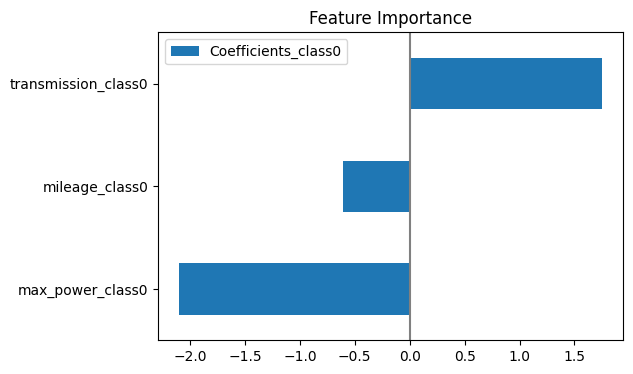

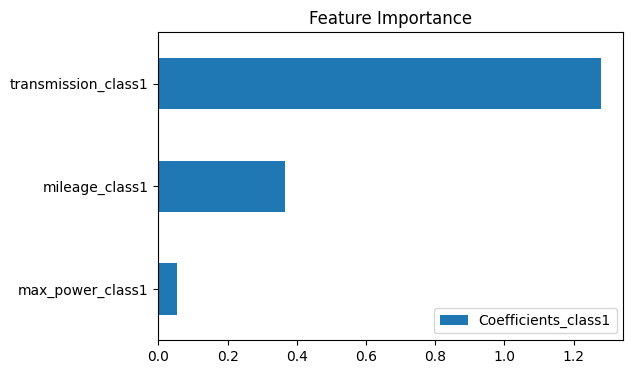

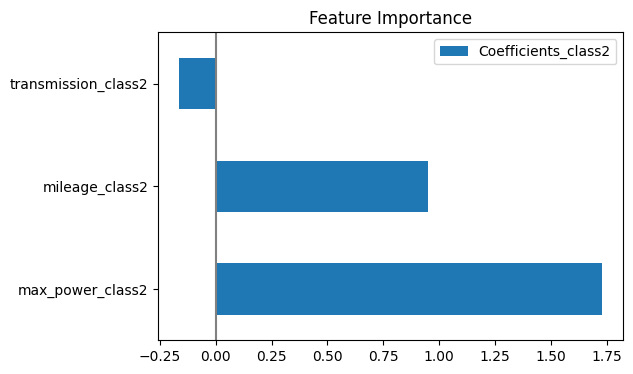

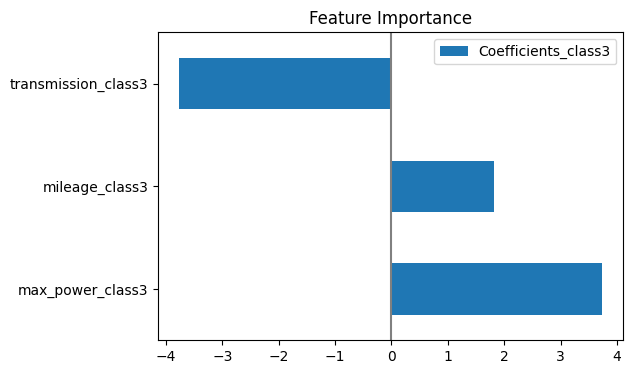

In [ ]:
import time

regs = ["Ridge", "Normal"]
methods = ["sto","minibatch", "batch"]

for reg in regs:
    for method in methods:
        params = {"k": k, "n": n, "method": method, "alpha": 0.00005, "l": 0.1}
        mlflow.start_run(run_name=f"reg-{reg}-method-{params['method']}-lr-{params['alpha']}-l-{params['l']}", nested=True)
        print("="*5, reg,method,"="*5)

        # #######
        type_of_regression = str_to_class(reg)    #Ridge, Normal
        model = type_of_regression(**params)  
        model.fit(X_train, y_train)
        model.feature_importance()

        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

        # #######

        mlflow.end_run()

From the cross-validation, the Normal minibatch model (reg-Normal-method-minibatch-lr-5e-05-l-0.1) is the best of my model because the ,ean of validation loss in 3 folds is lowest (0.7131365704253456) and standard deviation of validation in 3 folds is low (0.007846572159263468)

## 7. Testing

Test the model with test set (X_test) and calculate the accuracy, precision, recall, and f1 score of the best model with test set

In [ ]:
# the best model is Normal minibatch
from sklearn.metrics import classification_report

model = mlflow.pyfunc.load_model('runs:/1266fcd065a34fb8a3598bfb8c1d9ded/model/')
yhat = model.predict(X_test)

print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))


=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.56      0.17      0.26       108
           1       0.69      0.86      0.77       862
           2       0.72      0.54      0.62       574
           3       0.73      0.74      0.74        62

    accuracy                           0.70      1606
   macro avg       0.67      0.58      0.59      1606
weighted avg       0.69      0.70      0.68      1606



**what does support in the classification report means?**

It mean the number of sample on each class

### Calculate accuracy, precision, recall, and f1 score from scratch

In [ ]:
# find the T, FN, FP
T = np.zeros(k) # All true on each class
FN = np.zeros(k)
FP = np.zeros(k)


for i in range(len(y_test)):
    for c in range(k):
        if y_test[i] == c and yhat[i] == c:
            T[c] += 1
        if y_test[i] == c and yhat[i] != c:
            FN[c] += 1
        if y_test[i] != c and yhat[i] == c:
            FP[c] += 1

print(T)
print(FN)
print(FP)

[ 18. 743. 312.  46.]
[ 90. 119. 262.  16.]
[ 14. 332. 124.  17.]


In [ ]:
# calculate the accuracy 
acc = (np.sum(T))/len(y_test)

# calculate the precision 
precision = np.array([0,0,0,0], dtype=np.float32)
for c in range(k):
    p = T[c]/(T[c]+FP[c])
    precision[c] = p

# calculate the recall 
recall = np.array([0,0,0,0], dtype=np.float32)
for c in range(k):
    r = T[c]/(T[c]+FN[c])
    recall[c] = r

# calculate the f1 score 
f1 = np.array([0,0,0,0], dtype=np.float32)
for c in range(k):
    f = (2*precision[c]*recall[c])/(precision[c]+recall[c])
    f1[c] = f


In [ ]:
# print accuracy, precision, recall, and f1 score from scratch
print("Accuracy:", acc)
print()
for i in range(k):
    print(f"Precision_class{i}:",precision[i])
    print(f"recall_class{i}:", recall[i])
    print(f"f1_class{i}:", f1[i])
    print()

Accuracy: 0.6967621419676214

Precision_class0: 0.5625
recall_class0: 0.16666667
f1_class0: 0.25714287

Precision_class1: 0.69116277
recall_class1: 0.86194897
f1_class1: 0.76716566

Precision_class2: 0.7155963
recall_class2: 0.543554
f1_class2: 0.6178218

Precision_class3: 0.73015875
recall_class3: 0.7419355
f1_class3: 0.736



In [ ]:
# Calculate the macro precision, recall, and f1

Mprecision = np.sum(precision)/4
Mrecall = np.sum(recall)/4
Mf1 = np.sum(f1)/4

print("Macro precision:",Mprecision)
print("Macro recall:",Mrecall)
print("Macro f1:",Mf1)

Macro precision: 0.6748544573783875
Macro recall: 0.5785262584686279
Macro f1: 0.5945326089859009


In [ ]:
# Calculate the weighted precision, recall, and f1

weight = np.array([0.2,0.3,0.2,0.3])
Wprecision = (precision.T @ weight)
Wrecall = (recall.T @ weight)
Wf1 = (f1.T @ weight)
print("weighted precision:",Wprecision)
print("weighted recall:",Wrecall)
print("weighted f1:", Wf1)

weighted precision: 0.6820157170295715
weighted recall: 0.623209473490715
weighted f1: 0.6259426355361939


## 8. Analysis:  Feature Importance

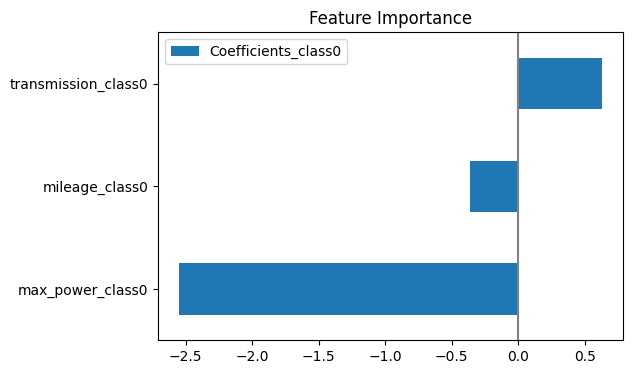

In [ ]:
# Feature importance of class 0
from IPython.display import Image
Image("/root/code/feature_class0.png")

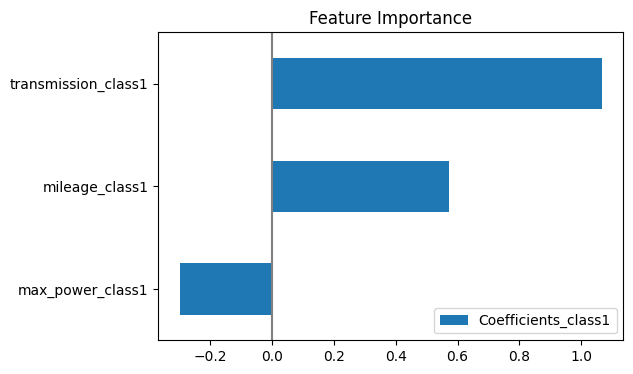

In [ ]:
# Feature importance of class 1
Image("/root/code/feature_class1.png")

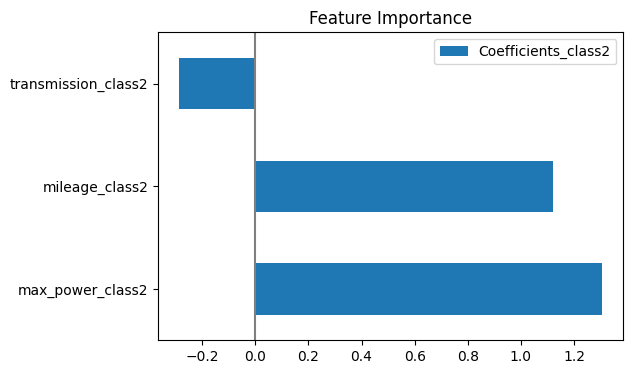

In [ ]:
# Feature importance of class 2
Image("/root/code/feature_class2.png")

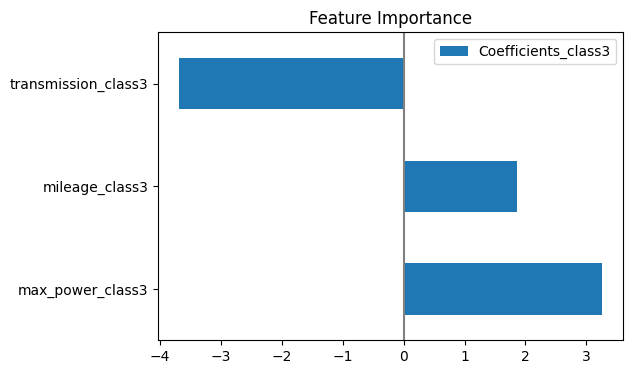

In [ ]:
# Feature importance of class 3
Image("/root/code/feature_class3.png")

From part7: testing, you can see that the precision, recall, and f1 score of class 0 is much lower than other classes. From the graph of class 0, the model learn mileage and max power that are negative effect on car price. I think it doesn't make sense.

## 9. Inference

In [ ]:
# Try to create the example from the dataset
df[ ['max_power', 'mileage','transmission']].loc[0]

max_power       74.0
mileage         23.4
transmission     1.0
Name: 0, dtype: float64

In [ ]:
# The real selling price of this sample
df['selling_price'].loc[0]

1

In [ ]:
# Create array of sample data

[max_power, mileage]  = scaler.transform([[103,21.14]])[0]
sample = np.array([[max_power, mileage, 0]])
intercept = np.ones((1, 1))
sample   = np.concatenate((intercept, sample), axis=1)

# Predict the selling price
predicted_price = model.predict(sample)
predicted_price

array([2])